<html>
<h1 style="text-align: center;">Peer to peer</h1>
<h3 style="text-align: center;">streaming capacity</h3>
<br />
</html>


# Contents
1. Introduction
2. Construction of mutitree
3. Primal-Dual Algorithm
   * Problem formulation
   * Smallest price tree problem
4. Numerical result
   * optimality
   * theoretical vs empirical convergence
5. (How to avoid free riding?)  <- It is interesting if we can discuss it.
5. Conclusion  
 
6. References

## 1. Introduction


==========Need to write==========




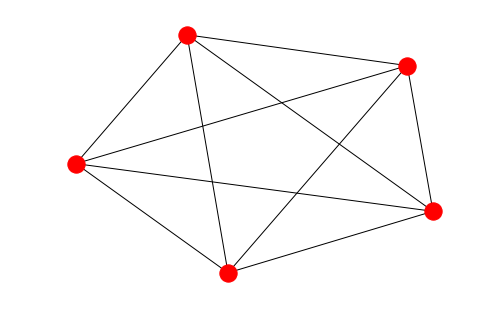

In [1]:
# example of a complete graph
import networkx as nx
import matplotlib.pyplot as plt
K_5=nx.complete_graph(5)
nx.draw(K_5)
plt.show()

## 2. Construction of mutitree
Here we introduce the optimal construction of multitree with the simplest topology, i.e. full mesh, no degree bound and without helper nodes.
### 2.1 case 1: $u_s \leq (u_s + \sum_{i=1}^Nu_i)/N$
### 2.1 case 2: $u_s > (u_s + \sum_{i=1}^Nu_i)/N$
### 2.3 Example problem
show a smiple example.


## 3. Primal-Dual algorithm
The method we have introduced is not general, it only works for the certain case. Here we show the method proposed by Sengupta et al. which solves the problem by using primal-dual loops.
### 3.1 Problem formulation (combinatorial optimization)
Show the mathematical formulation

### 3.2 Smallest price tree (SPT)
#### 3.2.1 Type1: Full mesh no degree bound no helper

#### 3.2.2 Type2: Full mesh no degree bound with helper

#### 3.2.3 Type3: Full mesh no degree bound no helper

#### 3.2.3 Type4: Full mesh with degree bound with helper

#### 3.2.3 Type5: General Graph, no degree bound no helper = minimum cost arborescence problem 
(if i could...)



## 4. Numerical result
### 4.1 Optimality
The primal-dual algorithm is not exact, we compare with the multi-cast forumulation.  (implement the algorithms for some toy topologies... )
### 4.2 Convergence
show the convergence of the algorithm vs the theoritical upper bound

Capacity of server: 768
Average capacity  : 588.8
Loop: 1000, Time: 0.062, Price: 0.000000
Loop: 2000, Time: 0.116, Price: 0.000000
Loop: 3000, Time: 0.174, Price: 0.000000
Loop: 4000, Time: 0.231, Price: 0.004720
Number of loop: 4364, Total time: 0.254

Price of the min tree   : $1.010
Value of dual objective : $585.819
Approx capacity rate    : $586.909


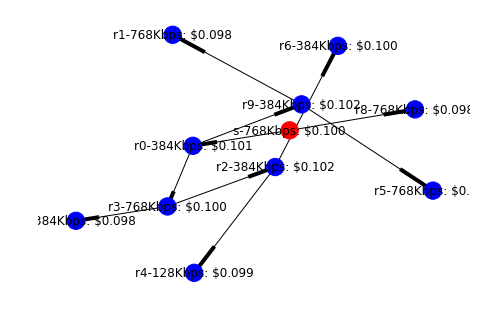

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from source import *

# Set Parameters
N = 10  # number of receivers
H = 5  # number of helpers
M = 2  # Degree bound
# M = N + 1  # NO Degree bound here
V = N + H + 1  # number of nodes (+ server) with helper
C = distribution(N)  # Decide the value of capacity for RECEIVERS
Ch = distribution(H)  # Decide the value of capacity for HELPERS
zeta = 0.1  # value for optimality
eps = 1 - 1 / np.sqrt(1 + zeta)  # rate for updating price
delta = (1 + eps) / (((1 + eps) * (N+1)) ** (1 / eps))  # value for the initial price Without helper
delta_h = (1 + eps) / (((1 + eps) * V) ** (1 / eps))  # value for the initial price With helper

# initialization of nodes
server = Node('s', 768, N + H + 1)  # fix the capacity to 768Kbps
receivers = []
helpers = []
for i in range(N):
    receivers.append(Node('r', C[i], N + H + 1, i))  # initialize the receivers
for i in range(H):
    helpers.append(Node('h', Ch[i], N + H + 1, i))  # initialize the helpers
graph_1 = Graph(1, server, receivers)              # Form 1: Full mesh, No degree bound, No helper
graph_2 = Graph(2, server, receivers, helpers)     # Form 2: Full mesh, No degree bound, With helper
graph_3 = Graph(3, server, receivers, None, M)     # Form 3: Full mesh, With degree bound, No helper
graph_4 = Graph(4, server, receivers, helpers, M)  # Form 4: Full mesh, With degree bound, With helper

# initialize the price for all Forms
graph_1.ini_price(delta)
graph_2.ini_price(delta_h)
graph_3.ini_price(delta)
graph_4.ini_price(delta_h)
# solution of multi-casting, only works for Form 1
print('Capacity of server: {0}'.format(server.capacity))
print('Average capacity  : {0}'.format((sum(C) + server.capacity) / N))

###################
###  Algorithm  ###
###################

# output_capacity, num_loop = primal_dual_single_session(graph_1, eps)
# output_capacity, num_loop = primal_dual_single_session(graph_2, eps)
output_capacity, num_loop = primal_dual_single_session(graph_3, eps)


## 5. Conclusion

## 6. References
